<a href="https://colab.research.google.com/github/GrzegorzMeller/AlgorithmsForMassiveData/blob/master/exercises_23_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises - 23/04

In the 23/04 lesson we will work on the CIFAR-10 database.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is provided with TensorFlow:

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(x, y), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


The dataset is organized as follows:

In [3]:
print(x.shape, y.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


The variable x contains 50000 images with dimension 32 x 32 x 3 (width, height, and three RGB channels).

The variable y represents labels for these 50000 images.

The same holds for the test variables, that refer to 10000 images.

Let's check some training samples:

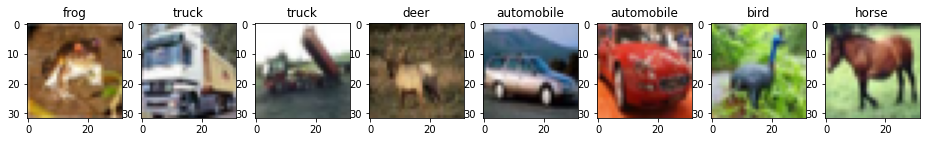

In [4]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(x[i])
    ax[i].set_title(cifar_classes[y[i][0]])

(50000, 32, 32, 1)


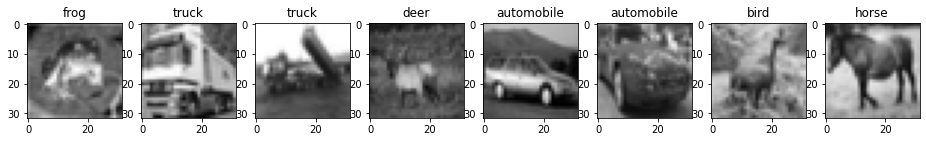

In [5]:
#convert RGB images to grayscale
import numpy as np
import matplotlib.pyplot as plt

X_train_gray = tf.image.rgb_to_grayscale(x, name=None)
print(X_train_gray.shape)
X_train_vis = np. reshape(X_train_gray,(50000,32,32))

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(X_train_vis[i], cmap='gray', vmin=0, vmax=255)
    ax[i].set_title(cifar_classes[y[i][0]])

In [6]:
#build neural network
model = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(32*32,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1

In [7]:
#data processing & flattening
from keras.utils import np_utils
X_train = np. reshape(X_train_gray,(50000,32*32))

#one hot encoding
Y_train = np_utils.to_categorical(y)
Y_test = np_utils.to_categorical(y_test)

X_test = tf.image.rgb_to_grayscale(x_test, name=None)
X_test = np. reshape(X_test,(10000,32*32))

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train)

Using TensorFlow backend.


(50000, 1024)
(50000, 10)
(10000, 1024)
(10000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.1
                    )

Epoch 1/15
352/352 [==============================] - 7s 21ms/step - loss: 2.0388 - accuracy: 0.2667 - val_loss: 2.2314 - val_accuracy: 0.1820
Epoch 2/15
352/352 [==============================] - 7s 21ms/step - loss: 1.9303 - accuracy: 0.3062 - val_loss: 1.9187 - val_accuracy: 0.3150
Epoch 3/15
352/352 [==============================] - 7s 21ms/step - loss: 1.8904 - accuracy: 0.3203 - val_loss: 1.9842 - val_accuracy: 0.2872
Epoch 4/15
352/352 [==============================] - 7s 21ms/step - loss: 1.8632 - accuracy: 0.3343 - val_loss: 1.8548 - val_accuracy: 0.3214
Epoch 5/15
352/352 [==============================] - 7s 21ms/step - loss: 1.8372 - accuracy: 0.3425 - val_loss: 1.8309 - val_accuracy: 0.3480
Epoch 6/15
352/352 [==============================] - 7s 21ms/step - loss: 1.8184 - accuracy: 0.3527 - val_loss: 1.8698 - val_accuracy: 0.3330
Epoch 7/15
352/352 [==============================] - 7s 21ms/step - loss: 1.8006 - accuracy: 0.3585 - val_loss: 1.8085 - val_accuracy: 0.3540

In [10]:
#model evaluation on test set
test_acc=model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7664 - accuracy: 0.3671


(1, 32, 32, 3) (1,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5000, 32, 32, 3) (5000, 1)


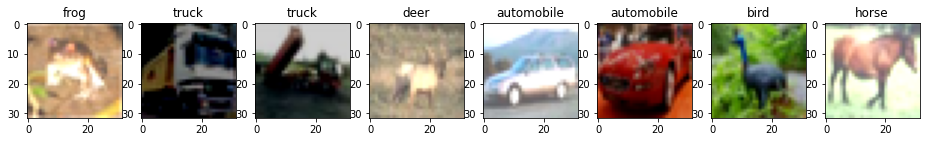

In [11]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  return image, label

def augment(image,label):
  image,label = convert(image, label)
  image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
  image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
  image = tf.image.flip_left_right(image) #flip the image 

  return image,label

X_aug, Y_aug = augment(x[0], y[0])
X_aug=np.reshape(X_aug,(1,32,32,3))
print(X_aug.shape, Y_aug.shape)
for p in range (1, 5000):
  nx, ny = augment(x[p],y[p])
  nx=np.reshape(nx,(1,32,32,3))
  X_aug= np.vstack((X_aug, nx))
  Y_aug = np.vstack((Y_aug, ny))

print(X_aug.shape, Y_aug.shape)

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(X_aug[i])
    ax[i].set_title(cifar_classes[Y_aug[i][0]])

(5000, 32, 32, 1)


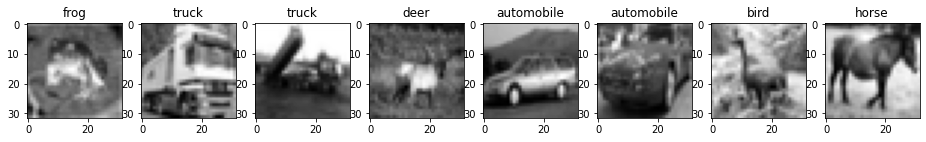

In [12]:
#converting augmented photos to 1D white-black
X_aug_train_gray = tf.image.rgb_to_grayscale(X_aug, name=None)
print(X_aug_train_gray.shape)
X_aug_train_vis = np. reshape(X_aug_train_gray,(5000,32,32))

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(X_aug_train_vis[i], cmap='gray')
    ax[i].set_title(cifar_classes[Y_aug[i][0]])

In [13]:
#agugmented data processing
X_aug_train = np. reshape(X_aug_train_gray,(5000,32*32))

#one hot encoding
Y_aug_train = np_utils.to_categorical(Y_aug)

X_aug_train = X_aug_train / 255.0
print(X_aug_train.shape, Y_aug_train.shape)

#appending augmented data to training dataset
X_train = np.vstack((X_train, X_aug_train)) 
Y_train = np.vstack((Y_train, Y_aug_train))
print(X_train.shape, Y_train.shape)

(5000, 1024) (5000, 10)
(55000, 1024) (55000, 10)


In [14]:
#running neural network (with augmented data)
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.1
                    )

Epoch 1/15
387/387 [==============================] - 8s 20ms/step - loss: 1.6934 - accuracy: 0.3981 - val_loss: 2.5303 - val_accuracy: 0.1322
Epoch 2/15
387/387 [==============================] - 7s 18ms/step - loss: 1.6885 - accuracy: 0.4015 - val_loss: 2.5399 - val_accuracy: 0.1249
Epoch 3/15
387/387 [==============================] - 6s 16ms/step - loss: 1.6834 - accuracy: 0.3999 - val_loss: 2.6073 - val_accuracy: 0.1305
Epoch 4/15
387/387 [==============================] - 6s 16ms/step - loss: 1.6788 - accuracy: 0.4045 - val_loss: 2.6347 - val_accuracy: 0.1327
Epoch 5/15
387/387 [==============================] - 6s 16ms/step - loss: 1.6720 - accuracy: 0.4093 - val_loss: 2.8751 - val_accuracy: 0.1249
Epoch 6/15
387/387 [==============================] - 6s 16ms/step - loss: 1.6592 - accuracy: 0.4135 - val_loss: 2.6042 - val_accuracy: 0.1275
Epoch 7/15
387/387 [==============================] - 6s 16ms/step - loss: 1.6442 - accuracy: 0.4181 - val_loss: 2.4749 - val_accuracy: 0.1260

In [15]:
#model evaluation on test set
test_acc=model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6362 - accuracy: 0.4237


For the 23/04 lesson, build an image classifier relying on the CIFAR-10 database.

To build the classifier proceed as follows:

## Feed-forward networks approach

Exploit the approach that you have seen on the MNIST dataset:

- convert RGB images to grayscale,
- flatten the images,
- build a feed-forward neural network. **Do not** use any convolutional layer,
- tune the network to improve the accuracy (try different number of neurons/layers, Dropout, Batch Normalization, etc.).

Assess the networks with the accuracy metric, as the dataset is perfectly class-balanced.

Does this approach works? Why? Why not?

### Hints

- To convert RGB images in grayscale you can implement a function relying on the following equation:
$$G_{ij} = 0.3 * R_{ij} + 0.59 * G_{ij} + 0.11 * B_{ij},$$
where $G_{ij}$ is the new grey pixel in position $ij$, and $R_{ij}$, $G_{ij}$, and $B_{ij}$ are respectively the red, green, and blu channel values in the original color image. You can even use the TensorFlow ```tf.image.rgb_to_grayscale``` ([doc](https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_grayscale)) function, which efficiently converts one or more images from RGB to Grayscale.
- To see the loss and accuracy curves like in the MNIST tutorial use TensorBoard: it is an interface provided by the TensorFlow library used to visualize loss and metrics plots, and network statistics useful to debug, and optimize the network step by step. You can learn how to use TensorBoard in [this](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb) Colab notebook.

### Extra

Data augmentation is a common technique to improve results and avoid overfitting. Data augmentation consists in making copies of the examples in the training dataset with small random modifications (in the case of images they can be flips, rotations, reflections, etc.). Data augmentation has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.

You can learn how to implement data augmentation in [this](https://www.tensorflow.org/tutorials/images/data_augmentation) Colab notebook.

## Concolutional Neural Networks approach

Test Convolutional Neural Networks (CNN) with RGB images as input.

In this case the design of the architecture can be difficult. Then start from a well-kwown model: consider the VGG model (reference paper: [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)). A VGG CNN model with a single VGG block is as follows:

In [0]:
model_cnn = tf.keras.Sequential([
                             
    ## Start of the VGG block
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    # End of the VGG block

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

The CNN architecture is obtained stacking convolutional layers with 3×3 filters, followed by max pooling layers. Together, these layers form a block. These blocks are repeated where the number of filters in each block is increased with the depth of the network as a power of 2. Padding is used on the convolutional layers to ensure the height and width of the output feature maps matches the inputs.

For instance, a CNN architecture composed of three VGG blocks is as follows:

In [16]:
model_cnn = tf.keras.Sequential([
    
    # 1st VGG block
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # 2nd VGG block
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    #3rd VGG block
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.BatchNormalization(center=True, scale=False),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        96        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)       

Experiment a CNN architecture based on the VGG model:
- try to use one or more VGG blocks,
- try to change the number of neurons/layers in the fully connected classification layer,
- try strategies to prevent overfitting (Dropout, Batch Normalization, etc.).

Extra: Even in this case, experiment data augmentation.

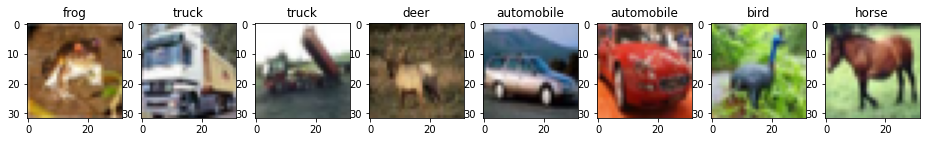

In [17]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = 8

f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(16, 6)

for i in range(images_to_plot):
    ax[i].imshow(x[i])
    ax[i].set_title(cifar_classes[y[i][0]])

In [18]:
from keras.utils import np_utils
#data preprocessing
X_train_cnn = x/255.0
Y_train_cnn = y
X_test_cnn = x_test/255.0
Y_test_cnn = y_test

#one hot encoding of output
Y_train_cnn = np_utils.to_categorical(Y_train_cnn)
Y_test_cnn = np_utils.to_categorical(Y_test_cnn)

print(X_train_cnn.shape, Y_train_cnn.shape, X_test_cnn.shape, Y_test_cnn.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [0]:
history_cnn = model_cnn.fit(X_train_cnn,
                    Y_train_cnn,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.1
                    )

Epoch 1/15
352/352 [==============================] - 334s 949ms/step - loss: 2.2291 - accuracy: 0.3510 - val_loss: 1.9623 - val_accuracy: 0.2878
Epoch 2/15
352/352 [==============================] - 330s 939ms/step - loss: 1.5170 - accuracy: 0.4642 - val_loss: 1.4303 - val_accuracy: 0.5090
Epoch 3/15
352/352 [==============================] - 333s 947ms/step - loss: 1.3169 - accuracy: 0.5439 - val_loss: 1.8909 - val_accuracy: 0.4848
Epoch 4/15
352/352 [==============================] - 332s 945ms/step - loss: 1.1969 - accuracy: 0.5931 - val_loss: 1.2023 - val_accuracy: 0.6414
Epoch 5/15
352/352 [==============================] - 337s 957ms/step - loss: 1.0945 - accuracy: 0.6349 - val_loss: 1.0774 - val_accuracy: 0.6470
Epoch 6/15
352/352 [==============================] - 333s 945ms/step - loss: 1.0468 - accuracy: 0.6494 - val_loss: 1.1277 - val_accuracy: 0.6508
Epoch 7/15
352/352 [==============================] - 334s 949ms/step - loss: 0.9920 - accuracy: 0.6698 - val_loss: 1.1392 -

In [19]:
#augmented data processing
X_aug_train_cnn = X_aug/255.0
Y_aug_train_cnn = np_utils.to_categorical(Y_aug)
print(X_aug_train_cnn.shape, Y_aug_train_cnn.shape)

#adding augmented data to the training set
X_train_cnn = np.vstack((X_train_cnn, X_aug_train_cnn))
Y_train_cnn = np.vstack((Y_train_cnn, Y_aug_train_cnn))

print(X_train_cnn.shape, Y_train_cnn.shape)

(5000, 32, 32, 3) (5000, 10)
(55000, 32, 32, 3) (55000, 10)


In [20]:
history_cnn = model_cnn.fit(X_train_cnn,
                    Y_train_cnn,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.1
                    )

Epoch 1/15
387/387 [==============================] - 398s 1s/step - loss: 2.1822 - accuracy: 0.3047 - val_loss: 2.5148 - val_accuracy: 0.1216
Epoch 2/15
387/387 [==============================] - 401s 1s/step - loss: 1.6195 - accuracy: 0.4159 - val_loss: 6.4797 - val_accuracy: 0.1329
Epoch 3/15
387/387 [==============================] - 401s 1s/step - loss: 1.4385 - accuracy: 0.4931 - val_loss: 3.6439 - val_accuracy: 0.1433
Epoch 4/15
387/387 [==============================] - 397s 1s/step - loss: 1.2826 - accuracy: 0.5609 - val_loss: 2.5073 - val_accuracy: 0.1487
Epoch 5/15
387/387 [==============================] - 399s 1s/step - loss: 1.1839 - accuracy: 0.6017 - val_loss: 2.6275 - val_accuracy: 0.1444
Epoch 6/15
387/387 [==============================] - 398s 1s/step - loss: 1.1313 - accuracy: 0.6225 - val_loss: 3.0586 - val_accuracy: 0.1456
Epoch 7/15
387/387 [==============================] - 396s 1s/step - loss: 1.0930 - accuracy: 0.6347 - val_loss: 2.3331 - val_accuracy: 0.1429

In [22]:
#model evaluation on test set
test_acc=model_cnn.evaluate(X_test_cnn, Y_test_cnn)

313/313 [==============================] - 17s 54ms/step - loss: 1.4841 - accuracy: 0.6285
